<a href="https://colab.research.google.com/github/iramjaved/OptusUBuildingAI/blob/main/BankTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


import pandas_profiling
# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
df = pd.read_csv('/data/bank-full.csv', sep=';')


In [188]:
pd.set_option('display.max_columns', None)
df.head()
#df.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [189]:
print(df.y.unique())
print(df['y'].value_counts(normalize=True))

['no' 'yes']
no     0.883015
yes    0.116985
Name: y, dtype: float64


In [190]:
print(df.contact.unique())
print(df.education.unique())
print(df.marital.unique())
print(df.poutcome.unique())
print(df['poutcome'].value_counts(normalize=True))

['unknown' 'cellular' 'telephone']
['tertiary' 'secondary' 'unknown' 'primary']
['married' 'single' 'divorced']
['unknown' 'failure' 'other' 'success']
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64


In [191]:


df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# New section

In [192]:
print(df['day'].value_counts().sort_index())
print(df['education'].value_counts(normalize=True))
df[['education','marital']].apply(pd.value_counts, normalize=True)


1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: day, dtype: int64
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


,education,marital
divorced,NaN,0.115171
married,NaN,0.601933
primary,0.151534,NaN
secondary,0.513194,NaN
single,NaN,0.282896
tertiary,0.294198,NaN
unknown,0.041074,NaN


In [193]:
corr_matrix = df.corr()

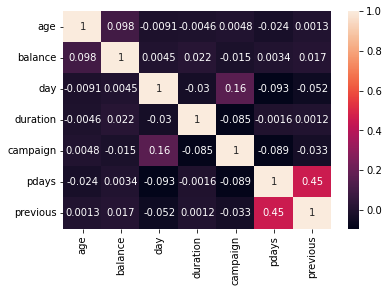

In [194]:

sns.heatmap(corr_matrix,annot=True)


In [195]:
corr_matrix['pdays'].sort_values(ascending=True)

day        -0.093044
campaign   -0.088628
age        -0.023758
duration   -0.001565
balance     0.003435
previous    0.454820
pdays       1.000000
Name: pdays, dtype: float64

In [196]:
df['education'] = 'education_' + df['education'].astype(str)
print(df.head())

   age           job  marital            education default  balance housing  \
0   58    management  married   education_tertiary      no     2143     yes   
1   44    technician   single  education_secondary      no       29     yes   
2   33  entrepreneur  married  education_secondary      no        2     yes   
3   47   blue-collar  married    education_unknown      no     1506     yes   
4   33       unknown   single    education_unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no  


In [197]:
one_hot_education=pd.get_dummies(df['education'])
print(one_hot_education)

       education_primary  education_secondary  education_tertiary  \
0                      0                    0                   1   
1                      0                    1                   0   
2                      0                    1                   0   
3                      0                    0                   0   
4                      0                    0                   0   
...                  ...                  ...                 ...   
45206                  0                    0                   1   
45207                  1                    0                   0   
45208                  0                    1                   0   
45209                  0                    1                   0   
45210                  0                    1                   0   

       education_unknown  
0                      0  
1                      0  
2                      0  
3                      1  
4                      1  
...      

In [198]:
df['marital'] = 'marital_' + df['marital'].astype(str)
df['job'] = 'job_' + df['job'].astype(str)
df['loan'] = 'loan_' + df['loan'].astype(str)
df['housing'] = 'housing_' + df['housing'].astype(str)
df['default'] = 'default_' + df['default'].astype(str)
df['contact'] = 'contact_' + df['contact'].astype(str)
#df['month'] = 'month_' + df['month'].astype(str)
df['poutcome'] = 'poutcome_' + df['poutcome'].astype(str)

print(df.head())

   age               job          marital            education     default  \
0   58    job_management  marital_married   education_tertiary  default_no   
1   44    job_technician   marital_single  education_secondary  default_no   
2   33  job_entrepreneur  marital_married  education_secondary  default_no   
3   47   job_blue-collar  marital_married    education_unknown  default_no   
4   33       job_unknown   marital_single    education_unknown  default_no   

   balance      housing      loan          contact  day month  duration  \
0     2143  housing_yes   loan_no  contact_unknown    5   may       261   
1       29  housing_yes   loan_no  contact_unknown    5   may       151   
2        2  housing_yes  loan_yes  contact_unknown    5   may        76   
3     1506  housing_yes   loan_no  contact_unknown    5   may        92   
4        1   housing_no   loan_no  contact_unknown    5   may       198   

   campaign  pdays  previous          poutcome   y  
0         1     -1         

In [199]:
one_hot_marital=pd.get_dummies(df['marital'])
one_hot_job=pd.get_dummies(df['job'])
one_hot_loan=pd.get_dummies(df['loan'])
one_hot_housing=pd.get_dummies(df['housing'])
one_hot_default=pd.get_dummies(df['default'])
one_hot_contact=pd.get_dummies(df['contact'])
#one_hot_month=pd.get_dummies(df['month'])
one_hot_poutcome=pd.get_dummies(df['poutcome'])
print(one_hot_marital)

       marital_divorced  marital_married  marital_single
0                     0                1               0
1                     0                0               1
2                     0                1               0
3                     0                1               0
4                     0                0               1
...                 ...              ...             ...
45206                 0                1               0
45207                 1                0               0
45208                 0                1               0
45209                 0                1               0
45210                 0                1               0

[45211 rows x 3 columns]


In [200]:
df=df.join(one_hot_education)
df=df.join(one_hot_marital)
df=df.join(one_hot_job)
df=df.join(one_hot_loan)
df=df.join(one_hot_housing)
df=df.join(one_hot_default)
df=df.join(one_hot_contact)
#df=df.join(one_hot_month)
df=df.join(one_hot_poutcome)

In [201]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,job_management,marital_married,education_tertiary,default_no,2143,housing_yes,loan_no,contact_unknown,5,may,261,1,-1,0,poutcome_unknown,no,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,44,job_technician,marital_single,education_secondary,default_no,29,housing_yes,loan_no,contact_unknown,5,may,151,1,-1,0,poutcome_unknown,no,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,33,job_entrepreneur,marital_married,education_secondary,default_no,2,housing_yes,loan_yes,contact_unknown,5,may,76,1,-1,0,poutcome_unknown,no,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
3,47,job_blue-collar,marital_married,education_unknown,default_no,1506,housing_yes,loan_no,contact_unknown,5,may,92,1,-1,0,poutcome_unknown,no,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,33,job_unknown,marital_single,education_unknown,default_no,1,housing_no,loan_no,contact_unknown,5,may,198,1,-1,0,poutcome_unknown,no,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


In [202]:
df = df.drop(columns=['marital','education','job','housing','loan','default','contact','month','poutcome'])
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


In [203]:
df['y'] = df['y'].apply(lambda x: 0 if x.strip()=='no' else 1)

In [204]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


In [205]:
# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print (train.shape, test.shape, validate.shape)
# (8999, 20) (3000, 20) (3000, 20)

(27126, 40) (9042, 40) (9043, 40)


In [206]:
X_train = train.drop(columns=['y'])
y_train = train[['y']]

X_test = test.drop(columns=['y'])
y_test = test[['y']]

X_validate = validate.drop(columns=['y'])
y_validate = validate[['y']]

X_train.head()
y_train.head()

,age,balance,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
30788,46,122,6,1047,2,1,7,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0
29073,60,553,2,343,1,210,3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0
7747,45,676,30,156,4,-1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
12557,33,1038,3,108,1,-1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1
4125,30,1312,19,285,2,-1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1


,y
30788,0
29073,0
7747,0
12557,0
4125,0


In [207]:
y_train.head()

,y
30788,0
29073,0
7747,0
12557,0
4125,0


In [208]:
#Logistic regression 
hrLogReg = LogisticRegression()
#fit the model on the training data
hrLogReg.fit(X_train, y_train)

LogisticRegression()

In [209]:
#Decision tree 
hrDecisionTree = tree.DecisionTreeClassifier()
hrDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [210]:
# K-nearest neighbour 
hrKNN = neighbors.KNeighborsClassifier()
hrKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [211]:
# XGBoost 
hrXGB = xgb.XGBClassifier()
hrXGB.fit(X_train,y_train)

XGBClassifier()

In [212]:
# Neural network - Multi-layer Perceptron
hrMLP = MLPClassifier()
hrMLP.fit(X_train,y_train)

MLPClassifier()

In [213]:
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([1., 0., 0., ..., 0., 0., 0.])

array([0., 1., 1., ..., 1., 1., 1.])

In [214]:
# DS: for clarity show without a loop
classifiers = [ hrMLP, hrXGB, hrKNN, hrDecisionTree, hrLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |   0.89   |  0.426   |     0.816     |  0.436   |
|     XGBClassifier      |  0.902   |  0.452   |     0.913     |  0.552   |
|  KNeighborsClassifier  |   0.88   |  0.328   |     0.765     |  0.307   |
| DecisionTreeClassifier |  0.862   |  0.432   |     0.684     |   0.25   |
|   LogisticRegression   |  0.894   |  0.324   |     0.856     |  0.463   |
+------------------------+----------+----------+---------------+----------+


In [215]:
#classification report
y_predict = hrLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7997
           1       0.61      0.22      0.32      1045

    accuracy                           0.89      9042
   macro avg       0.76      0.60      0.63      9042
weighted avg       0.87      0.89      0.87      9042



In [216]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)



[[7851  146]
 [ 815  230]]


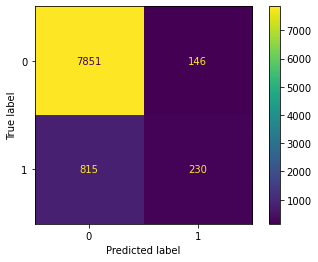

In [217]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(hrLogReg, X_test, y_test, values_format='.0f')

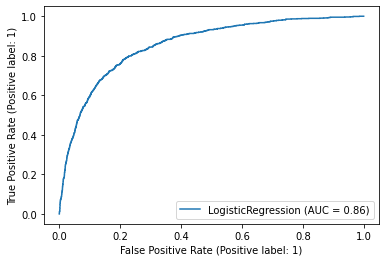

In [218]:
# A single ROC curve
metrics.plot_roc_curve(hrLogReg, X_test, y_test)

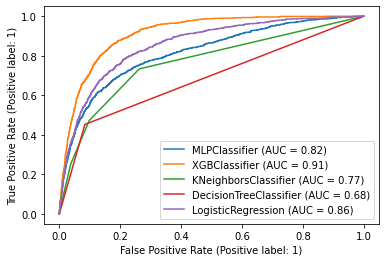

In [219]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

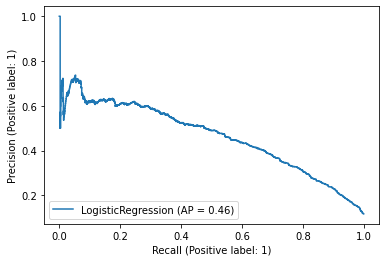

In [220]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(hrLogReg, X_test, y_test)

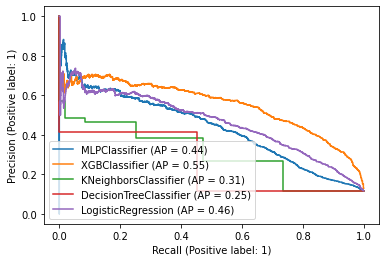

In [221]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

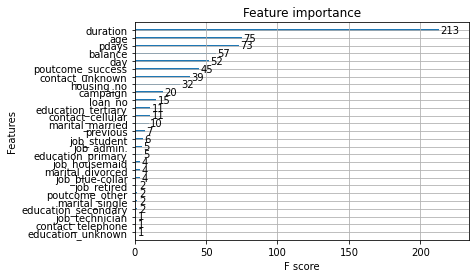

In [222]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(hrXGB)

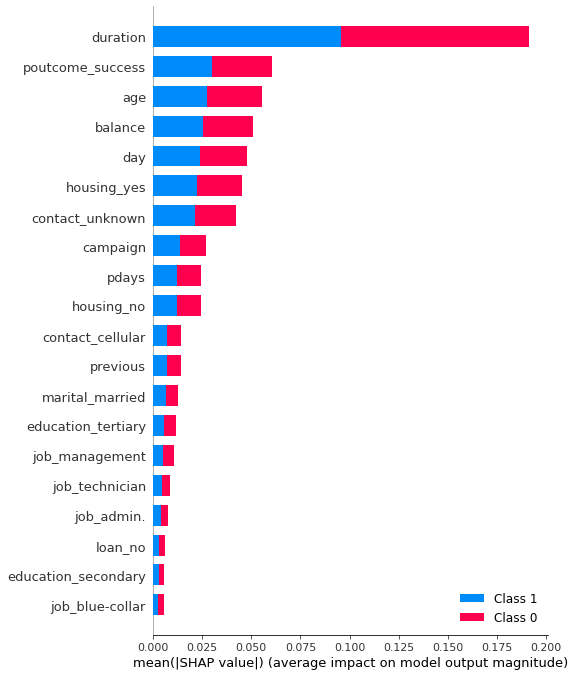

In [223]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(hrDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)

In [ ]:
sns.pairplot(df, hue = "contact")

KeyError: ignored